In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler, normalize
import datetime as dt

%matplotlib inline

In [2]:
df = pd.read_csv("customer-behaviour.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      5000 non-null   object
 1   region    5000 non-null   object
 2   payment   5000 non-null   int64 
 3   weekend   5000 non-null   bool  
 4   category  5000 non-null   object
 5   customer  5000 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 200.3+ KB


In [4]:
# change to datetime and get day month year
df.time = pd.to_datetime(df.time, infer_datetime_format=True)

In [5]:
#TODO create day month year
# df['year'] = df.time.dt.year
df['month'] = df.time.dt.month
df['day'] = df.time.dt.day

In [6]:
df.corr()


,payment,weekend,customer,month,day
payment,1.000000,0.011055,-0.013555,-0.001682,0.033253
weekend,0.011055,1.000000,-0.026976,0.004200,0.000087
customer,-0.013555,-0.026976,1.000000,-0.000571,0.010760
month,-0.001682,0.004200,-0.000571,1.000000,-0.013560
day,0.033253,0.000087,0.010760,-0.013560,1.000000


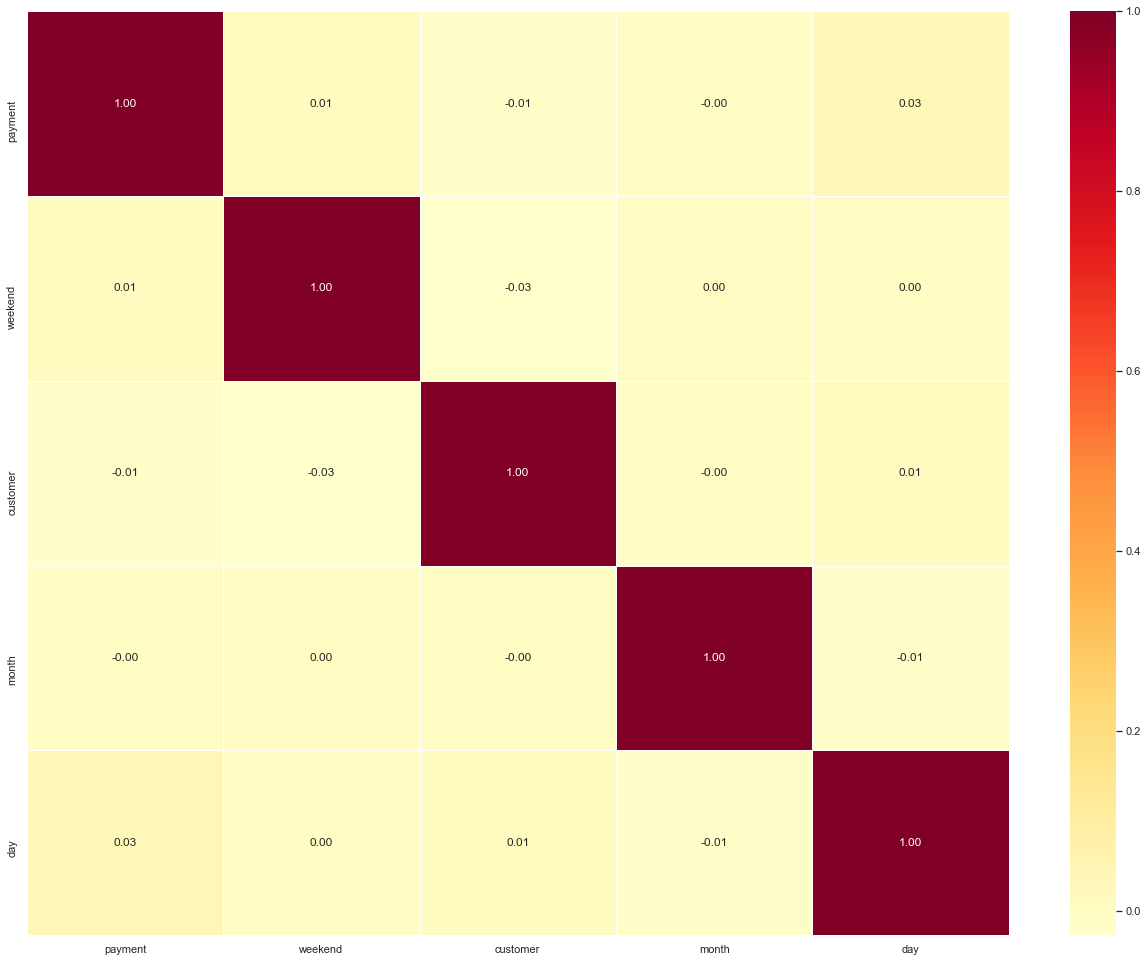

In [7]:
# Use heatmap to visualize correlation table
sns.set_theme(style="darkgrid")
corr_m = df.corr()
fig, ax = plt.subplots(figsize=(22,17))
ax = sns.heatmap(corr_m,
                 annot=True,
                 linewidth=0.9,
                 fmt='.2f',
                 cmap='YlOrRd',
                 cbar=True);

In [8]:
# Check the value of different columns
df.category.value_counts()


C6     124
C19    121
C5     120
C31    118
C36    117
C39    114
C37    114
C22    113
C46    112
C15    112
C11    110
C7     110
C27    109
C9     108
C35    108
C43    107
C33    107
C20    107
C25    106
C3     105
C14    103
C10    103
C24    103
C16    102
C34    101
C47    100
C8     100
C21     99
C26     99
C30     98
C45     98
C28     98
C2      97
C49     97
C17     95
C38     94
C23     94
C1      93
C40     93
C44     91
C42     91
C12     91
C13     91
C48     91
C41     89
C29     89
C18     88
C32     86
C4      84
Name: category, dtype: int64

In [9]:

# Check missing data
df.isnull().sum()/len(df)

time        0.0
region      0.0
payment     0.0
weekend     0.0
category    0.0
customer    0.0
month       0.0
day         0.0
dtype: float64

In [10]:


# exported to csv
# df.to_csv('cleaned_data.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      5000 non-null   datetime64[ns]
 1   region    5000 non-null   object        
 2   payment   5000 non-null   int64         
 3   weekend   5000 non-null   bool          
 4   category  5000 non-null   object        
 5   customer  5000 non-null   int64         
 6   month     5000 non-null   int64         
 7   day       5000 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(2)
memory usage: 278.4+ KB


In [12]:
# getting the number of invoices per month

# grouping the dataframe by year and month
month_grp = df.sort_values('month').groupby(['month'])

month_inv = month_grp['payment'].unique().agg(np.size)
month_inv

month
1     419
2     411
3     438
4     394
5     408
6     378
7     430
8     455
9     417
10    410
11    420
12    405
Name: payment, dtype: int64

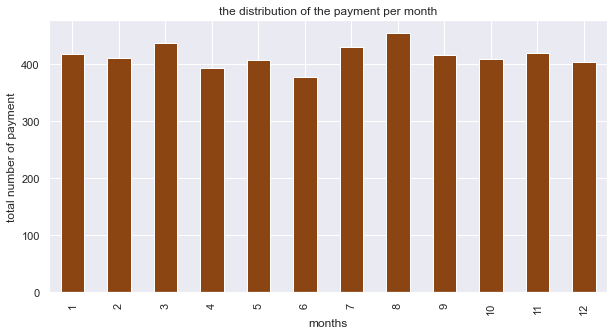

In [13]:
# plotting the distribution of the payment per month
plt.figure(figsize=(10,5))
month_inv.plot.bar(color='saddlebrown')

plt.title("the distribution of the payment per month")
plt.xlabel("months")
plt.ylabel("total number of payment")
plt.show()

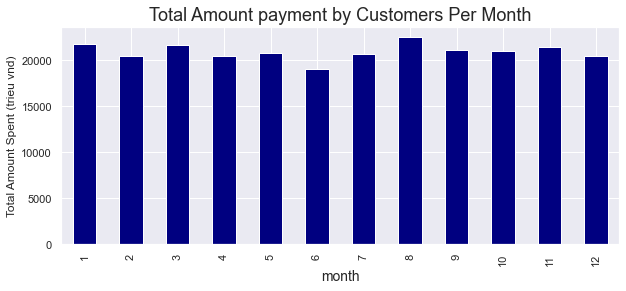

In [14]:

# total amount payment per month
mamount_grp = month_grp['payment'].agg(np.sum)/1000000
mamount_grp



plt.figure(figsize=(10,4))
mamount_grp.plot.bar(color='navy')
plt.title("Total Amount payment by Customers Per Month", fontsize=18)
plt.xlabel("month", fontsize=14)
plt.ylabel("Total Amount Spent (trieu vnd)")
plt.show()

In [15]:
# Frequency of the most sold  items
region_grp = df.sort_values('region').groupby(['region'])
region_com = (region_grp['payment'].agg(np.sum)/1000000).sort_values(ascending=False)
region_com.head(10)

region
Quận 3            15312.174
Quận 12           14857.938
Quận Thủ Đức      14769.192
Quận 7            14395.379
Quận 1            14079.650
Quận 10           13636.530
Quận Tân Phú      13505.683
Quận Phú Nhuận    13474.279
Quận 6            13473.133
Quận 2            13404.891
Name: payment, dtype: float64

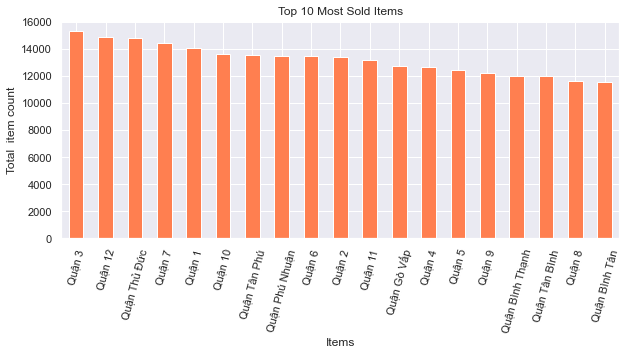

In [16]:

plt.figure(figsize=(10,4))
region_com.plot.bar(color='coral')

plt.title("Top 10 Most Sold Items")
plt.xlabel("Items")
plt.xticks(rotation=75)
plt.ylabel("Total  item count")
plt.show()

In [17]:
# Frequency of category
category_grp = df.sort_values('category').groupby(['category'])
category_com = (category_grp['payment'].agg(np.sum)/1000000).sort_values(ascending=False)
category_com.head(10)

category
C36    6362.576
C46    6218.404
C39    6202.848
C6     5938.124
C34    5861.666
C19    5842.561
C37    5771.382
C5     5746.465
C24    5744.863
C25    5709.108
Name: payment, dtype: float64

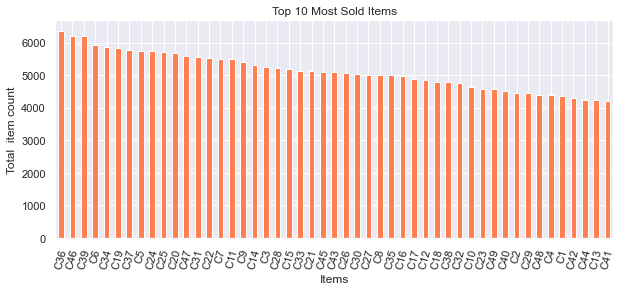

In [18]:

plt.figure(figsize=(10,4))
category_com.plot.bar(color='coral')

plt.title("Top 10 Most Sold Items")
plt.xlabel("Items")
plt.xticks(rotation=75)
plt.ylabel("Total  item count")
plt.show()


## MODELING

In [19]:
from sklearn.cluster import KMeans

In [20]:
# Find the columns which contain strings
[label for label, content in df.items() if pd.api.types.is_string_dtype(content)]

['region', 'category']

In [21]:

# Convert all columns with string values into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      5000 non-null   datetime64[ns]
 1   region    5000 non-null   category      
 2   payment   5000 non-null   int64         
 3   weekend   5000 non-null   bool          
 4   category  5000 non-null   category      
 5   customer  5000 non-null   int64         
 6   month     5000 non-null   int64         
 7   day       5000 non-null   int64         
dtypes: bool(1), category(2), datetime64[ns](1), int64(4)
memory usage: 212.2 KB


In [23]:
df.category.cat.categories

Index(['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C2', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27',
       'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36',
       'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45',
       'C46', 'C47', 'C48', 'C49', 'C5', 'C6', 'C7', 'C8', 'C9'],
      dtype='object')

In [24]:
df.category.cat.codes

df['weekend'] = df['weekend']*1
df['category_code']=df.category.cat.codes;
df['region_code']=df.region.cat.codes

In [25]:
df.shape

(5000, 10)

In [26]:
df = df.drop(columns=['time', 'category', 'region'])

In [27]:

# Let's scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [28]:
df.head()

,payment,weekend,customer,month,day,category_code,region_code
0,73068000,0,73,1,1,18,4
1,82438000,0,197,1,1,12,18
2,42577000,0,475,1,1,17,9
3,67038000,0,58,1,1,26,15
4,97465000,0,330,1,1,32,2


In [29]:

df_scaled.shape

(5000, 7)

In [30]:

df_scaled

array([[ 0.78537695, -0.62268166, -1.23677472, ..., -1.6635948 ,
        -0.43415065, -0.88371973],
       [ 1.10741335, -0.62268166, -0.37995905, ..., -1.6635948 ,
        -0.85729943,  1.650607  ],
       [-0.26256455, -0.62268166,  1.54096639, ..., -1.6635948 ,
        -0.50467545,  0.02139696],
       ...,
       [ 1.17013656, -0.62268166, -1.60990412, ...,  1.6261148 ,
        -1.5625474 , -0.34064972],
       [-1.37982809, -0.62268166,  0.69106053, ...,  1.6261148 ,
        -0.36362585, -1.42678975],
       [ 0.93470973, -0.62268166,  0.31793113, ...,  1.6261148 ,
         1.04687008, -1.60781308]])

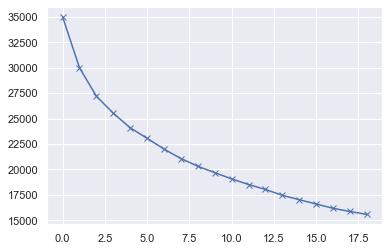

In [31]:
scores_1=[]
range_values=range(1,20)
for i in range_values :
    k_means=KMeans(n_clusters=i)
    k_means.fit(df_scaled)
    scores_1.append(k_means.inertia_)

plt.plot(scores_1,'bx-')


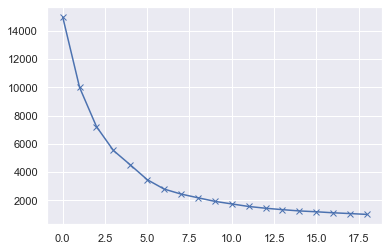

In [32]:
scores_1=[]
range_values=range(1,20)
for i in range_values :
    k_means=KMeans(n_clusters=i)
    k_means.fit(df_scaled[:,:3])
    scores_1.append(k_means.inertia_)

plt.plot(scores_1,'bx-')

In [33]:

#applying kmeans method
kmeans = KMeans(3)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [34]:
kmeans.cluster_centers_.shape

(3, 7)

In [35]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,payment,weekend,customer,month,day,category_code,region_code
0,-0.144768,-0.622682,-0.031841,0.131404,-0.841074,0.021524,0.016847
1,0.135434,-0.622682,0.067000,-0.140942,0.868004,-0.011280,-0.011888
2,0.017753,1.605957,-0.043323,0.006744,0.000139,-0.013879,-0.006981


In [36]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,payment,weekend,customer,month,day,category_code,region_code
0,4.600442e+07,1.387779e-15,247.380328,6.958470,8.250820,24.461202,8.974863
1,5.415720e+07,1.276756e-15,261.684715,6.018613,23.316977,23.996052,8.816131
2,5.073316e+07,1.000000e+00,245.718683,6.528275,15.666428,23.959198,8.843236


In [37]:
labels.shape

(5000,)

In [38]:
labels.max()

2

In [39]:
labels.min()

0

In [40]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [41]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,payment,weekend,customer,month,day,category_code,region_code,cluster
0,73068000,0,73,1,1,18,4,0
1,82438000,0,197,1,1,12,18,0
2,42577000,0,475,1,1,17,9,0
3,67038000,0,58,1,1,26,15,0
4,97465000,0,330,1,1,32,2,0


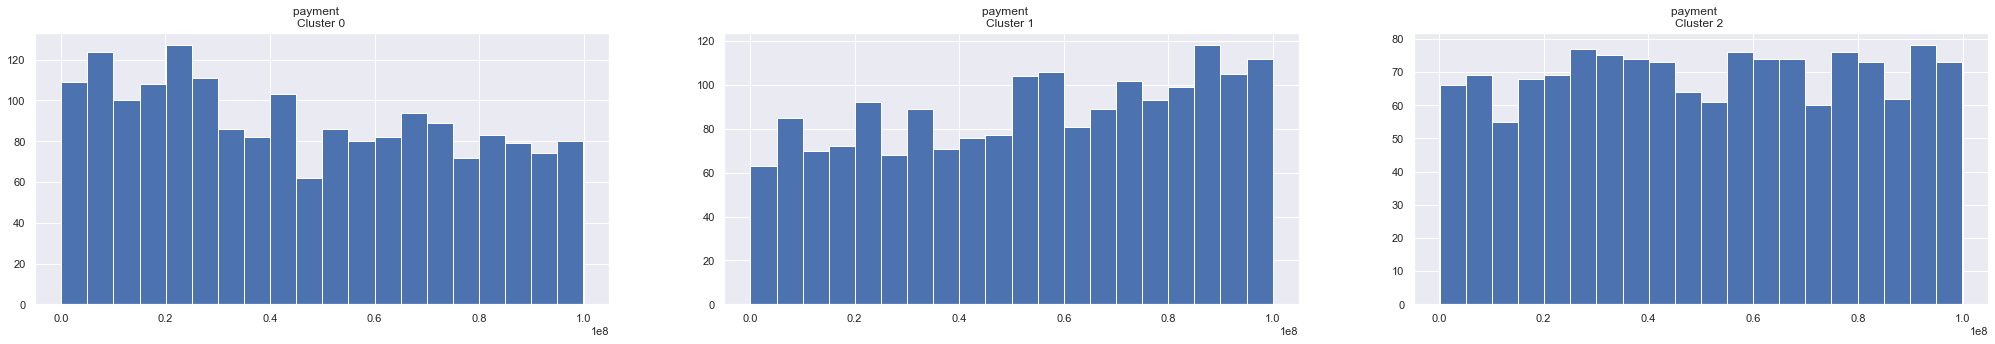

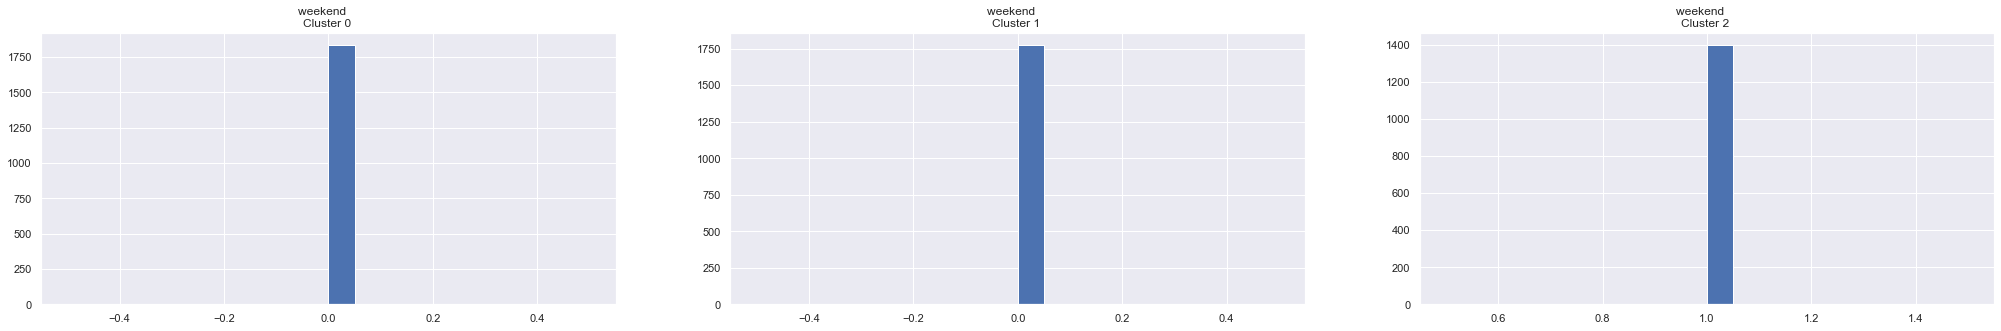

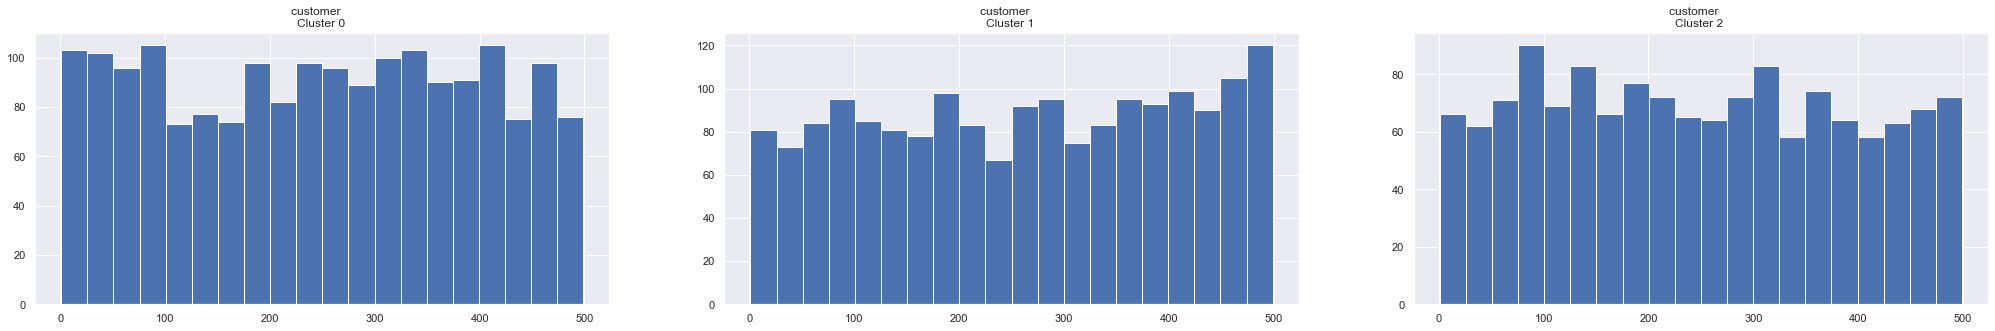

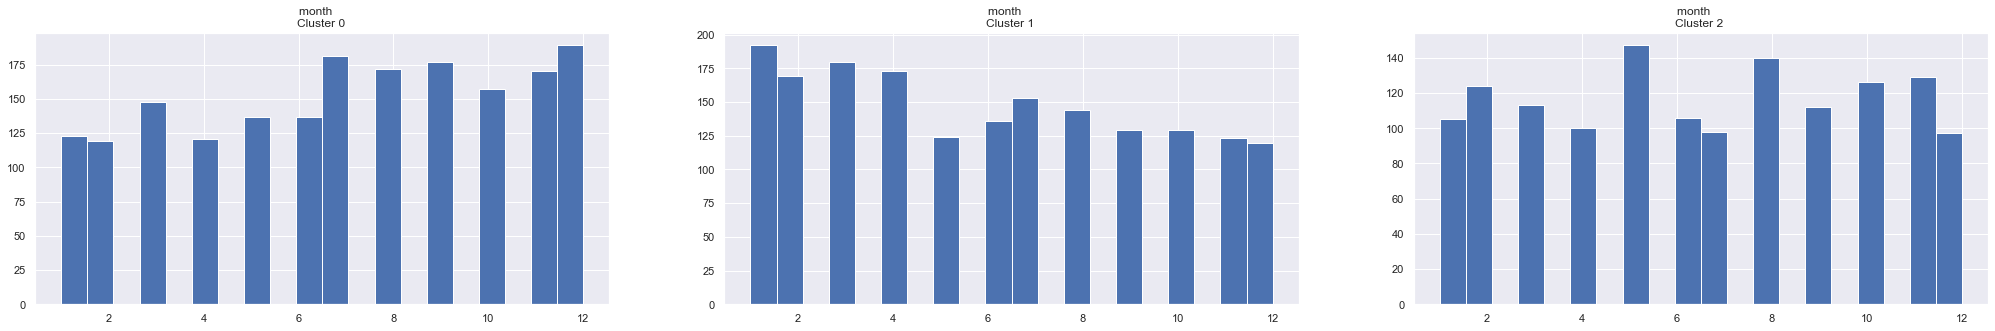

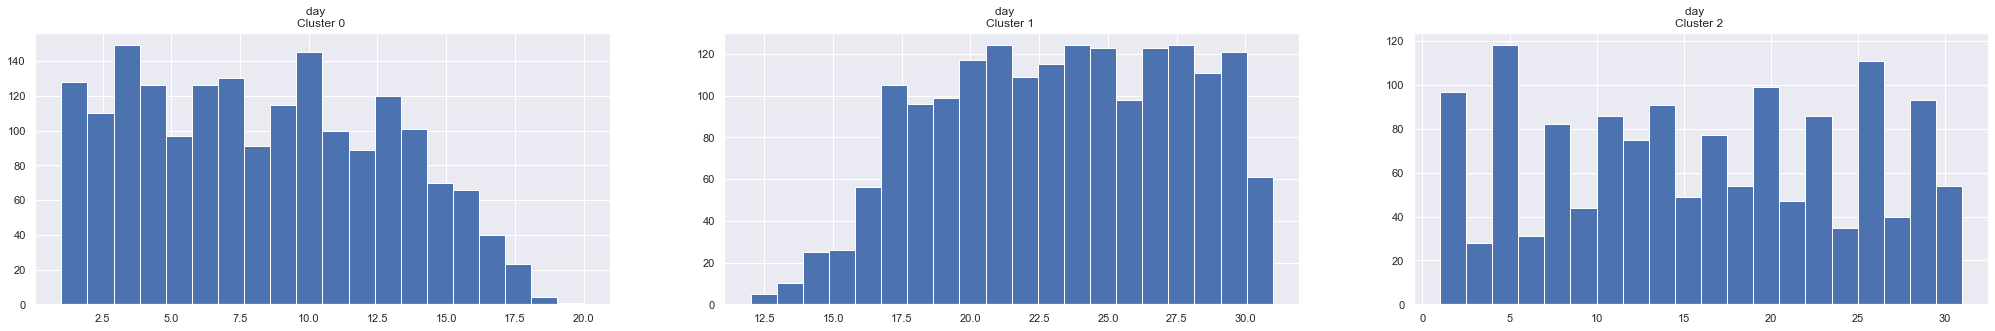

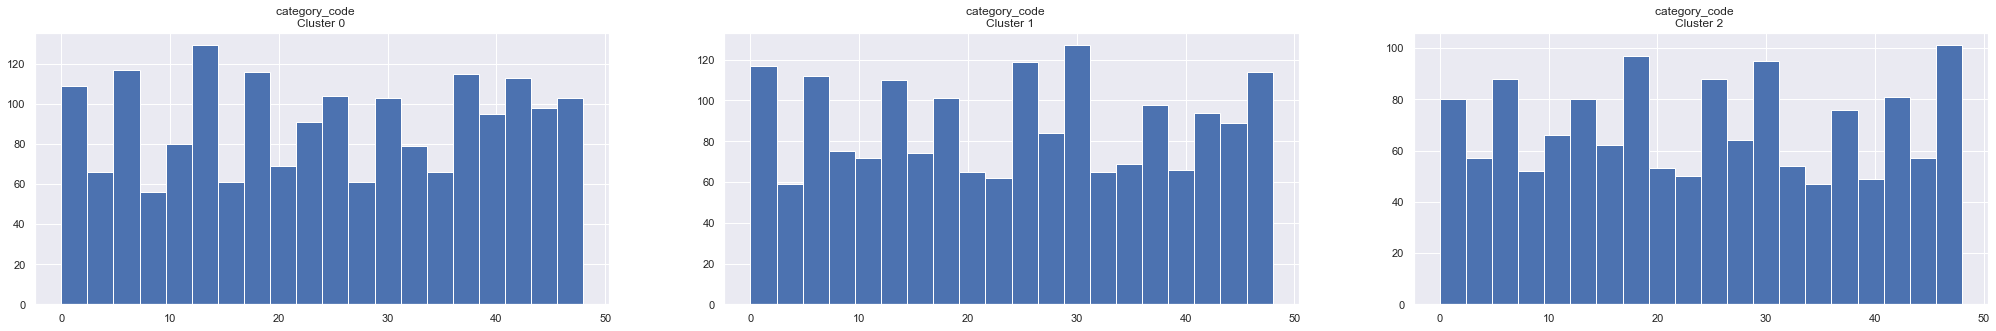

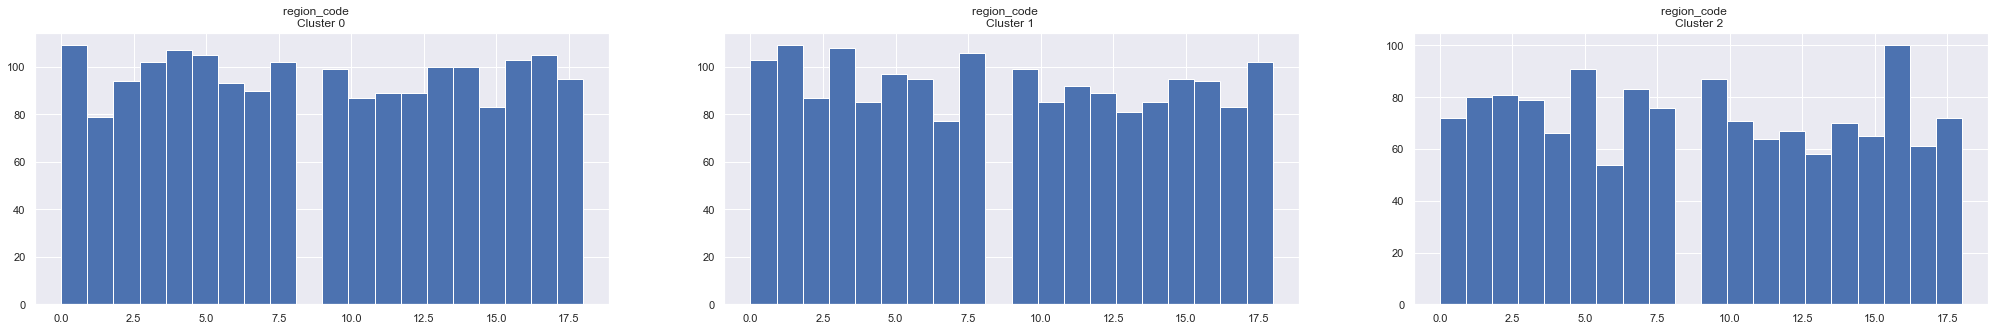

In [42]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()

## Run regressions model


In [43]:
%matplotlib inline

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [44]:
df_modeling = creditcard_df_cluster
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   payment        5000 non-null   int64
 1   weekend        5000 non-null   int64
 2   customer       5000 non-null   int64
 3   month          5000 non-null   int64
 4   day            5000 non-null   int64
 5   category_code  5000 non-null   int8 
 6   region_code    5000 non-null   int8 
 7   cluster        5000 non-null   int32
dtypes: int32(1), int64(5), int8(2)
memory usage: 224.7 KB


In [45]:
df_modeling.head()


,payment,weekend,customer,month,day,category_code,region_code,cluster
0,73068000,0,73,1,1,18,4,0
1,82438000,0,197,1,1,12,18,0
2,42577000,0,475,1,1,17,9,0
3,67038000,0,58,1,1,26,15,0
4,97465000,0,330,1,1,32,2,0


In [46]:
# Create X (Features Matrix)
X = df_modeling.drop("cluster", axis = 1)
# Create y (labels)
y = df_modeling["cluster"]
X.shape, y.shape

((5000, 7), (5000,))

In [47]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets
np.random.seed(44)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

We're going to try _three_ different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest

In [48]:

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, roc_curve, plot_roc_curve


# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, Xtrain, Xtest, ytrain, ytest):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    Xtrain: training data (no labels)
    Xtest: testing data (no labels)
    ytrain: training labels
    ytest: test labels
    """
    # Set random seed
    np.random.seed(44)
    # Make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        model.fit(Xtrain, ytrain)
        # evaluate model and append score
        model_scores[name] = model.score(Xtest, ytest)
    return model_scores

In [49]:
model_scores = fit_and_score(models=models,
                             Xtrain=Xtrain,
                             Xtest=Xtest,
                             ytrain=ytrain,
                             ytest=ytest)
model_scores

{'Logistic Regression': 0.36466666666666664,
 'KNN': 0.364,
 'Random Forest': 0.984}

## Model Comparison

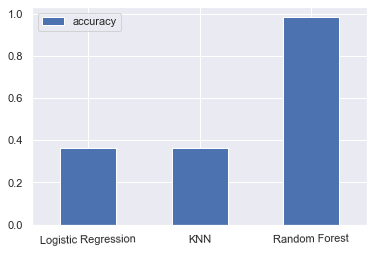

In [50]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()
plt.xticks(rotation=1);

How to improve the baseline metrics?

| classification | regression                     |
| ---------------| -------------------------------|
| **accuracy**   | **r^2**                        |
| precision      | mean absolute error            |
| recall         | maen squared error (MSE)       |
| f1             | root mean squared error (RMSE) |

Ideas:

* hyperparameter tuning
* feature importance
* confusion matrix
* precision
* recall
* f1 score
* classification report
* roc curve
* area under the curve (AUC)

## Hyperparameter Tuning (by Hand)

In [51]:
# Tune KNN
np.random.seed(44)

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit algorithm
    knn.fit(Xtrain, ytrain)

    # Update training scores list
    train_scores.append(knn.score(Xtrain, ytrain))

    # Update test_scores list
    test_scores.append(knn.score(Xtest, ytest))

In [52]:
train_scores

[1.0,
 0.6754285714285714,
 0.64,
 0.5954285714285714,
 0.5497142857142857,
 0.5328571428571428,
 0.5168571428571429,
 0.5151428571428571,
 0.504,
 0.49742857142857144,
 0.488,
 0.4877142857142857,
 0.4805714285714286,
 0.47685714285714287,
 0.47314285714285714,
 0.4634285714285714,
 0.47,
 0.4642857142857143,
 0.4602857142857143,
 0.46514285714285714]

In [53]:
test_scores

[0.37,
 0.37266666666666665,
 0.36666666666666664,
 0.3546666666666667,
 0.364,
 0.38066666666666665,
 0.354,
 0.36666666666666664,
 0.3526666666666667,
 0.356,
 0.35733333333333334,
 0.34933333333333333,
 0.346,
 0.352,
 0.3506666666666667,
 0.3526666666666667,
 0.36333333333333334,
 0.362,
 0.36333333333333334,
 0.36666666666666664]

Maximum KNN score on test data: 38.07%


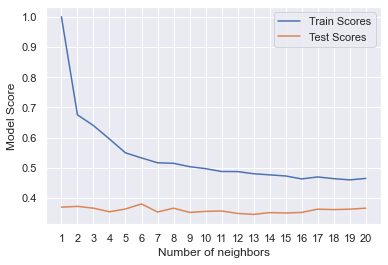

In [54]:
plt.plot(neighbors, train_scores, label='Train Scores')
plt.plot(neighbors, test_scores, label='Test Scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend();

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

## Hyperparamter Tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression
* RandomForestClassifier

### Tuning Logistic Regression

In [55]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-6, 6, 20),
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(3, 20, 3),
           'min_samples_leaf': np.arange(1, 20, 3)}

### Tuning Logistic Regression

In [56]:
# Tune Logistic Regression

np.random.seed(44)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(Xtrain, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-06, 4.28133240e-06, 1.83298071e-05, 7.84759970e-05,
       3.35981829e-04, 1.43844989e-03, 6.15848211e-03, 2.63665090e-02,
       1.12883789e-01, 4.83293024e-01, 2.06913808e+00, 8.85866790e+00,
       3.79269019e+01, 1.62377674e+02, 6.95192796e+02, 2.97635144e+03,
       1.27427499e+04, 5.45559478e+04, 2.33572147e+05, 1.00000000e+06]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [57]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 233572.14690901214}

In [58]:
rs_log_reg.score(Xtest, ytest)


0.996

### Tuning Random Forest

In [59]:
# Tune Random Forest

np.random.seed(44)

# Setup random hyperparameter search for LogisticRegression
rs_rf_reg = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=10,
                               verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_rf_reg.fit(Xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  4,  7, 10, 13, 16, 19]),
                                        'min_samples_split': array([ 3,  6,  9, 12, 15, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [60]:
rs_rf_reg.best_params_

{'n_estimators': 210,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_depth': None}

In [61]:
# Evaluate the tuned model
rs_rf_reg.score(Xtest, ytest)


0.9806666666666667

## Evaluating tuned machine learning classifier, beyond accuracy

* ROC curve, AUC curve
* Confusion matrix
* Classificatoin report
* Precision
* Recall
* F1-score

... with cross-validation where possible.

To make comparions and evaluate our trained model, we need to make predictions first.

### ROC curve and AUC metric

In [62]:
# Make predictions with best tuned model on test/train-split data-
ypreds = rs_rf_reg.predict(Xtest)
ypreds_log = rs_log_reg.predict(Xtest)

### Confusion Matrix



In [63]:
# Confusion matrix
cm = confusion_matrix(ytest, ypreds)

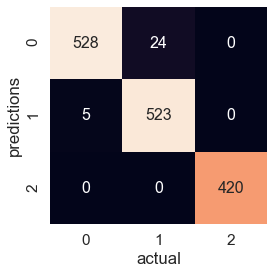

In [64]:
# Plot confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm.T, annot=True, fmt='d', annot_kws={"size": 16}, square=True, cbar=False)
plt.xlabel('actual')
plt.ylabel('predictions');

### Classifiction Report

In [65]:
# Classification Report on train/test-split data
print(classification_report(ytest, ypreds))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       533
           1       0.99      0.96      0.97       547
           2       1.00      1.00      1.00       420

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



#### confusion for log

In [66]:
# Confusion matrix
cm_log = confusion_matrix(ytest, ypreds_log)

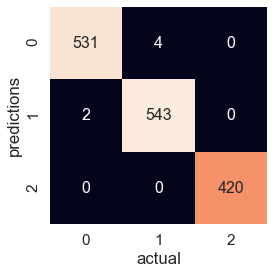

In [67]:
# Plot confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm_log.T, annot=True, fmt='d', annot_kws={"size": 16}, square=True, cbar=False)
plt.xlabel('actual')
plt.ylabel('predictions');

### Classifiction Report

In [68]:
# Classification Report on train/test-split data
print(classification_report(ytest, ypreds_log))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       533
           1       1.00      0.99      0.99       547
           2       1.00      1.00      1.00       420

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

